# Dataset and Data Preprocessing

Pandas is a useful python library for data manipulation

In [68]:
import pandas as pd

iris = pd.read_csv("data/iris.csv") #read the csv file - default mode
iris.head() #show first 5 dataset entries


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


You can custom read a csv file with these parameters:
- **header**: from which row you can get features
- **names**: you can define property names with a custom dictionary
- **sep**: you can specify the separator of the columns in the file

Every property(column) in the dataframe is called _feature_

In [69]:
iris = pd.read_csv("data/iris.csv", sep=",", header=0, names=["sepal_length","sepal_width","petal_length","petal_width","species"]) #read the csv file - default mode
iris.head() #show first 5 dataset entries

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To show other usefull informations about the dataset:

In [70]:
iris.columns #show all features
iris.info() #other informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Dataframe and Series
A dataframe is composed by different _series_: another data type in Pandas. A serie is a simple mono dimensional array.

You can get single serie with pandas by calling dataset with header title as a key

In [71]:
Y = iris['species']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

You can obtain same goal by calling dataset with keys array 

In [72]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


the main difference between series and dataframe is the header, in  a serie header there isn't a title, in this example you should remove _species_ column in a different way: by dropping it:

In [73]:
X = iris.drop('species', axis=1) #with axis=1 you remove a column, in this case you want to remove species and so it make sense 
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Selection and editing of data

with _loc_ or _iloc_ method you can slicing data:

In [74]:
iris.loc[10] #select the row with index 10
iris.loc[:5, 'petal_length'] #select first 5 index rows (only feature petal_l) 
iris.iloc[10] #select the row in position 10 (not with index 10)
iris.iloc[:5, 2] #select first 5 rows (only second feature -> petal_l)

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

You can also randomize dataframe with _sample_ function:
- **n**: number of items from axis to return
- **frac**: fraction of axis items to return (not compatible with _n_)
- **weights**: default _none_, series of weights for every column
- **random_state**: if you pass a int it will be the seed for the pseudo number generator
- **axis**: 1 for column, 0 for index
- **ignore_index**: if True the resulting index will be labeled in 0,1...n-1

In [75]:

iris_sampled = iris.sample(frac=1, random_state=0) #randomize order of dataset

To avoid to edit original dataset you can copy it with:

In [76]:
iris_copy = iris.copy() #copy dataset

### Stats

In [77]:
iris.shape #dataset size


(150, 5)

In [78]:

iris.describe() #some statistical informations


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Masks and filters

In [79]:
long_petal_mask = iris['petal_length'] > iris['petal_length'].mean() #this is the mask, a series of boolean values with true where conditions is true and false where condition is false
iris_long_petal = iris[long_petal_mask] # when you pass a boolean series of index to an array it returns only elements where index is true -> basically a mask
iris_long_petal.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


You can also edit dataframe conditionally with mask:

In [80]:
iris_copy = iris.copy()
setosa_mask = iris['species'] == 'setosa' #mask
iris_copy.loc[setosa_mask, 'species'] = "undefined" #assign undefined where specie is setosa
iris_copy['species'].unique()

array(['undefined', 'versicolor', 'virginica'], dtype=object)

### Visualization wiht Matplotlib

Plot has a lot of parameters and allow you to print charts on the page:
	
- data : DataFrame
- x : label or position, default None
- y : label, position or list of label, positions, default None, Allows plotting of one column versus another
- kind : str 
    - *line* : line plot (default)
    - *bar* : vertical bar plot
    - *barh* : horizontal bar plot
    - *hist* : histogram
    - *box* : boxplot
    - *kde* : Kernel Density Estimation plot
    - *density* : same as *kde*
    - *area* : area plot
    - *pie* : pie plot
    - *scatter* : scatter plot
    - *hexbin* : hexbin plot
 
- ax : matplotlib axes object, default None
- subplots : boolean, default False, Make separate subplots for each column
- sharex : boolean, default True if ax is None else False. In case subplots=True, share x axis and set some x axis labels to invisible; defaults to True if ax is None otherwise False if an ax is passed in; Be aware, that passing in both an ax and sharex=True will alter all x axis labels for all axis in a figure!
- sharey : boolean, default False. In case subplots=True, share y axis and set some y axis labels to invisible
- layout : tuple (optional). (rows, columns) for the layout of subplots
- figsize : a tuple (width, height) in inches
- use_index : boolean, default True. Use index as ticks for x axis
- title : string or list, Title to use for the plot. If a string is passed, print the string at the top of the figure. If a list is passed and subplots is True, print each item in the list above the corresponding subplot.
- grid : boolean, default None (matlab style default) Axis grid lines
- legend : False/True/’reverse’. Place legend on axis subplots
- style : list or dict. matplotlib line style per column
- logx : boolean, default False. Use log scaling on x axis
- logy : boolean, default False. Use log scaling on y axis
- loglog : boolean, default False. Use log scaling on both x and y axes
- xticks : sequence. Values to use for the xticks
- yticks : sequence. Values to use for the yticks
- xlim : 2-tuple/list
- ylim : 2-tuple/list
- rot : int, default None. Rotation for ticks (xticks for vertical, yticks for horizontal plots)
- fontsize : int, default None. Font size for xticks and yticks
- colormap : str or matplotlib colormap object, default None. Colormap to select colors from. If string, load colormap with that name from matplotlib.
- colorbar : boolean, optional. If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)
- position : float. Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
- table : boolean, Series or DataFrame, default False. If True, draw a table using the data in the DataFrame and the data will be transposed to meet matplotlib’s default layout. If a Series or DataFrame is passed, use passed data to draw a table.
- yerr : DataFrame, Series, array-like, dict and str. See Plotting with Error Bars for detail.
- xerr : same types as yerr.
- stacked : boolean, default False in line and bar plots, and True in area plot. If True, create stacked plot.
- sort_columns : boolean, default False. Sort column names to determine plot ordering
- secondary_y : boolean or sequence, default False. Whether to plot on the secondary y-axis If a list/tuple, which columns to plot on secondary y-axis
- mark_right : boolean, default True. When using a secondary_y axis, automatically mark the column labels with “(right)” in the legend
- **kwds : keywords. Options to pass to matplotlib plotting method

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

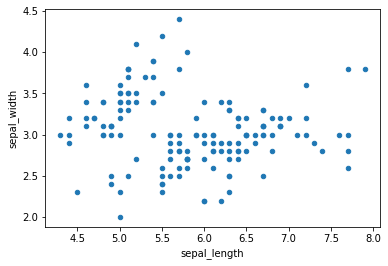

In [81]:
import matplotlib.pyplot as plt

iris_2feats = iris[['sepal_length','sepal_width']]
iris_2feats.plot(kind="scatter", x='sepal_length',y='sepal_width')

## Operations on dataset

In [82]:
X = iris.drop('species',axis=1)
X_norm = (X - X.min())/(X.max()-X.min())  #min max normalization
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [83]:
iris.sort_values('petal_length').head() #sort ascending, to descending use parameter ascending=False

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa


In [84]:
grouped_species = iris.groupby(['species']) # group by species
grouped_species.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


If you have invalid data inside a dataset. With Pandas you can fix it:

In [85]:
import numpy as np #ignore it for the moment, only to create random array

iris_nan = iris.copy()

n_val = iris.shape[0] #shape return array (n_index, n_features), we need number of indexes
samples = np.random.randint(n_val, size=(10)) #we create a random 10 elements array with each value between 0 and n_val -> only to random select 10 elements

iris_nan.loc[samples,'petal_length']=None #we replace 10 random petal length values with a None value

iris_nan['petal_length'].isnull().sum() #we count None element in iris_nan -> 10 of course

10

Now we can fix invalid elements, we replace NaN values with the average value of the dataset to avoid perturbing the statistic, *fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)* fill na or NaN values:
- **value**: value used to fill
- **method**: *{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None*
- **axis**: *{0 or ‘index’, 1 or ‘columns’}*
- **inplace**: True or False, if True fill-in-place
- **limit**: If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill
- **downcast**: A dict of item->dtype of what to downcast if possible
- return dataframe or not -> depending on *inplace*

In [86]:
mean_petal_length = iris_nan['petal_length'].mean()
iris_nan['petal_length'].fillna(mean_petal_length, inplace=True) # fillna fill na or NaN values 
iris_nan['petal_length'].isnull().sum() #check invalid values

0

We can do operations on row or column with *apply* method, first argument must be function to apply

In [87]:
iris.apply(np.count_nonzero, axis=1).head() #we count values different from zero for every row

0    5
1    5
2    5
3    5
4    5
dtype: int64

In [88]:
iris.apply(np.count_nonzero, axis=0).head() #we count values different from zero for every feature

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Use applymap to apply lambda function (elements)

In [89]:
X = iris.drop('species',axis=1)
X = X.applymap(lambda val:int(round(val,0))) #round values to closer int
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5,4,1,0
1,5,3,1,0
2,5,3,1,0
3,5,3,2,0
4,5,4,1,0


## Qualitative Data

All data in machine learning (and in computer science of course) must be numeric and discrete. In real life there a lot of data types:
- Continuos Quantitative variables: price, altitude, temperature etc.
- Ordinal Qualitative Varaibles: clothes sizes, podium position
- Nominal Qualitative Variables: colors

All machine learning input must be numeric so we have to convert all non numeric values in numeric values.

### mapping of ordinal variables

#### Numpy

**Numpy** is a python library that offer a lot of vector operations, **scikit-learn** is a library useful for machine learning purposes.

We can map ordinal variable with *numpy.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)*:
* **pyfunc**: python function or method
* **otypes**: output data type, it should be *str* or *list of dtypes*
* **doc**: docstring for the function
* **excluded**: set of strings or integers representing the positional or keyword arguments

In [90]:
import numpy as np

shirts = pd.read_csv("data/shirts.csv",index_col=0)
X = shirts.values # -> from dataset to pure array
size_mapping = {"S":0,"M":1,"L":2,"XL":3} # dictionary, the map
fmap = np.vectorize(lambda t:size_mapping[t])
X[:,0] = fmap(X[:,0])
X[:5]

array([[0, 'bianco', 4.99],
       [1, 'bianco', 19.99],
       [3, 'bianco', 12.49],
       [3, 'bianco', 14.99],
       [0, 'bianco', 14.99]], dtype=object)

#### Pandas

we can obtain same result with pandas library

In [91]:
size_mapping = {"S":0,"M":1,"L":2,"XL":3} #dictionary, the map
shirts["taglia"] = shirts["taglia"].map(size_mapping) #we map sizes with correspondent number
shirts.head() #the return value is a dataset and not an array

,taglia,colore,prezzo
0,0,bianco,4.99
1,1,bianco,19.99
2,3,bianco,12.49
3,3,bianco,14.99
4,0,bianco,14.99


### One-Hot encoding

We can't map Nominal qualitative variables with an ordinal list but can use boolean encoding called one-hot. We have to create one column for each class to encode, *true* or *1* value mean belonging, for example if there are 3 colors: white, black and red. we can create 3 columns called *white*, *black* and *red*, every single shirt has 1 only in the column that correspond to its color and 0 in the others

this variables are called *dummy*

To do so we can use *ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)* that apply transformations only in specified columns:
* **transformers**: list of (name, transformers, columns) tuples to be applied to subsets of the data
  * *Name*: this allows the transformer to be set
  * *transformer*
  * *columns*:  Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where transformer expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data X and can return any of the above
* **Remainder**: non-specified columns dropped by default or passed through
* **sparse_threshold**: from 0 to 1, if the overall density of returned matrix is lower than this value it will be stacked as a sparse matrix
*  **n_jobs**: jobs to run in parallel, -1 -> all processors, 1 -> 1 processors
*  **transformer_weights**: dictionary where keys are transformer name, values are weight for which returned value are multiplied
*  **verbose**: if True execution time will be printed
*  **verbose_feature_names_out**: if True *get_feature_names_out* will be prefix of returned features name 

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


X = shirts.values 
transf = ColumnTransformer([('ohe', OneHotEncoder(), [1])], remainder="passthrough")

X = transf.fit_transform(X)

X[:5] 

array([[1.0, 0.0, 0.0, 0, 4.99],
       [1.0, 0.0, 0.0, 1, 19.99],
       [1.0, 0.0, 0.0, 3, 12.49],
       [1.0, 0.0, 0.0, 3, 14.99],
       [1.0, 0.0, 0.0, 0, 14.99]], dtype=object)

You should obtain same result with pandas dataframe:

In [93]:
shirts_copy = shirts.copy()
shirts_copy = pd.get_dummies(shirts,columns=["colore"])
shirts_copy.tail()

,taglia,prezzo,colore_bianco,colore_rosso,colore_verde
95,2,9.99,1,0,0
96,1,14.99,0,0,1
97,0,12.49,0,1,0
98,2,12.49,0,1,0
99,0,19.99,0,1,0


## Missing data

to manage missing data we will use numpy and pandas

In [94]:
import pandas as pd
import numpy as np

iris = pd.read_csv("data/iris.csv", header=0, names=["sepal_length","sepal_width","petal_length","petal_width","class"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
iris_nan = iris.copy()
max_val = iris.shape[0]

samples = np.random.randint(max_val, size=(10)) #we create 10 elements random array
iris_nan.loc[samples,'petal_length']=None #we sobstitute random index element with None value

nan_count = iris_nan['petal_length'].isnull().sum() #count Non element (of course they are 10)
print("Dataset has "+str(nan_count)+" missing values")
iris_nan.to_csv("data/iris_with_nan.csv") # save into new file

Dataset has 10 missing values


We create also new numpy array with these values:

In [96]:
Y = iris_nan["class"].values # only values of class feature
X = iris_nan.drop("class",axis=1).values #all values except for class feature

There are 2 methods to manage missing values:

### method 1: remove properties or examples with missing values

In [97]:
samples_before = iris_nan.shape[0]
iris_drop = iris_nan.dropna() #function that remove NaN values from iris_nan

samples_after = iris_drop.shape[0] #get new size

print("Number before dropping: "+str(samples_before))
print("Number after dropping: "+str(samples_after))

Number before dropping: 150
Number after dropping: 140


### method 2: Imputation -> replace missing values with an estimation

#### Pandas
we can do it with pandas (dataset) or numpy (array)

In [98]:
replace_with = iris_nan['petal_length'].mean() # imputation with average value
#replace_with = iris_nan['petal_length'].median() # imputation with median value
#replace_with = iris_nan['petal_length'].mode() # imputation with mode value
iris_nan['petal_length'].fillna(replace_with,inplace=True) # replace NaN values with first argument
nan_count = iris_nan['petal_length'].isnull().sum() #count numbers of NaN values
print("Dataset has now "+str(nan_count)+" missing values")

Dataset has now 0 missing values


#### Numpy and scikit-learn
we can use *SimpleImputer(\*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)[source]* function (scikit-learn library), type of imputation can be specified:
* **missing values**:
* **strategy**: mean / median / most_frequent / constant
* **fill_value**: when constant!=0 specify here the value 
* **copy**: if True a copy will be created, if False imputation will be made in-place where possible
* **add_indicator**: If True, a MissingIndicator transform will stack onto output of the imputer’s transform. This allows a predictive estimator to account for missingness despite imputation

In [99]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X_imp = imp.fit_transform(X)

nan_count = np.count_nonzero(np.isnan(X_imp))
print("dataset has "+str(nan_count)+" missing values")

dataset has 0 missing values


## Feature and Scaling

if a dataset values are in same range of values train phase will be faster.
There are 2 methods to achieve this goal:
* **normalization**: brings values in a range between 0 and 1:
    $$x_{norm} = \frac{x^i - x_{min}}{x_{max} - x_{min}}$$
* **standardization** brings values in a range between -1 and 1 with mean value equal to 0 and variance equal to 1:
    $$x_{std} = \frac{x^i - x_{mean}}{x_{sd}}$$

### Normalization

#### Numpy and scikit-learn

In [100]:
""" 
IMPORT DATA
"""
import pandas as pd
wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=['class','alcol','flavonoidi'], 
                    usecols=[0,1,7])
"""
END IMPORT DATA
"""

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X = wines.drop("class",axis=1).values # target value has classes and it should not be normalized, so we remove it
X_norm = mms.fit_transform(X)
X_norm[:5]

array([[0.84210526, 0.57383966],
       [0.57105263, 0.51054852],
       [0.56052632, 0.61181435],
       [0.87894737, 0.66455696],
       [0.58157895, 0.49578059]])

#### Pandas

In [101]:
wines_norm = wines.copy()

features = ["alcol","flavonoidi"] # columns to normalize
to_norm = wines_norm[features]
wines_norm[features] = (to_norm-to_norm.min())/(to_norm.max()-to_norm.min()) #we implement custom algorithm and we execute it on the entire dataframe
wines_norm.head()

,class,alcol,flavonoidi
0,1,0.842105,0.573840
1,1,0.571053,0.510549
2,1,0.560526,0.611814
3,1,0.878947,0.664557
4,1,0.581579,0.495781


### Standardization

#### Numpy and scikit-learn
we use *class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)*:
* **copy**: if false try to in place substitution
* **with_mean**: if True center the data before scaling
* **with_std**: if True scale the data to unit variance

standard scaler has these methods:
* *fit(X[, y, sample_weight])*: 	 Compute the mean and std to be used for later scaling.
* *fit_transform(X[, y])*: Fit to data, then transform it
* *get_feature_names_out([input_features])*: get output feature names for transformation
* *get_params([deep])*: get parameters for this estimator
* *inverse_transform(X[, copy])*: scale back the data to the original representation
* *partial_fit(X[, y, sample_weight])*: Online computation of mean and std on X for later scaling
* *set_params(\*\*params)*: Set the parameters of this estimator
* *transform(X[, copy])*: perform standardization by centering and scaling

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = wines.drop("class",axis=1).values
X_std = ss.fit_transform(X) #compute meand and std before transform 
X_std[:5]

array([[1.51861254, 1.03481896],
       [0.24628963, 0.73362894],
       [0.19687903, 1.21553297],
       [1.69154964, 1.46652465],
       [0.29570023, 0.66335127]])

#### Pandas

N.B. Pandas use sample std with denominator-1 (sampling standard deviation) so results could be different from numpy standardization (this difference become insignificant when number of samples tend to infinite)

In [103]:
wines_std = wines.copy()

features = ["alcol","flavonoidi"]
to_std = wines_std[features]
wines_std[features] = (to_std - to_std.mean())/to_std.std()
wines_std[:5]

,class,alcol,flavonoidi
0,1,1.514341,1.031908
1,1,0.245597,0.731565
2,1,0.196325,1.212114
3,1,1.686791,1.462399
4,1,0.294868,0.661485


## Dataset splitting
to test predictive model we have to split dataset into 2 parts: train part and test part, we can train machine on trainset and we can test it on testset.
Keep in mind that target of a dataset is the feature about which we want to gain a deeper understanding.

we can load boston dataset directly from scikit learn library:

In [104]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston() #deprecated from 1.2 version 

c:\Users\miche\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (


### Numpy and scikit learn (more important)
we will use *sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)*:
* **\*arrays**: Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes
* **test_size**: if Float between 0.0 and 1.0, if Int it represent the absolute number of test samples, if None the value is set by *train_size* (alternatively is 0.25 by default)
* **train_size**: complement of *test_size*
* **random_state**: Int seed for a random shuffle
* **shuffle**: Whether or not to shuffle the data before splitting. If False then Stratify must be None
* **Stratify**: if not None data is split in a stratified fashion, using this as the class labels
  ![Stratified split](img/1.png "stratified split")

In [105]:
from sklearn.model_selection import train_test_split

X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3) #l'attributo test_size corrisponde  alla frazione di dataset da usare per il test

### Pandas

In [106]:
import pandas as pd
import numpy as np

boston_df = pd.DataFrame(data= np.c_[boston.data, boston.target], columns= np.append(boston['feature_names'], 'TARGET'))
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [107]:
boston_test_df = boston_df.sample(frac=0.3)
boston_train_df = boston_df.drop(boston_test_df.index)

print("Train set element numbers: "+str(boston_train_df.shape[0]))
print("Test set element numbers: "+str(boston_test_df.shape[0]))

Train set element numbers: 354
Test set element numbers: 152


# Regression


## Simple Linear Regression
We will predict *value of houses* in Boston Dataset

### 1. Import data


In [108]:
import pandas as pd
import numpy as np
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', usecols=[5,13], names=["RM", "MEDV"])
boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


### 2. Creation of variables for regression

MEDV will be our target: Median value of owner-occupied homes in $1000s 

In [109]:
X = boston.drop("MEDV", axis=1).values #all except for medv (data)
Y = boston["MEDV"].values #target

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

we can implement now linear regression on train set and prediction on test set.

*class sklearn.linear_model.LinearRegression(\*, fit_intercept=True,copy_X=True, n_jobs=None, positive=False)[source]* has these parameters:
* **fit_intercept**: default to True, calculate intercept for this model. If False, no intercept will be used
* **copy_X**: if True X will be copied; else it will be overwritten
* **n_jobs**: number of jobs to use for the computation
* **positive**: only for dense array, if True force coefficients to be positive

Methods are:
* **fit(X, y[, sample_weight])**: Fit linear model
* **get_params([deep])**: Get parameters for this estimator
* **predict(X)**: Predict using the linear model
* **score(X, y[, sample_weight])**: Return the coefficient of determination of the prediction
* **set_params(\*\*params)**: set the parameters of this estimator

In [110]:
from sklearn.linear_model import LinearRegression

ll = LinearRegression()
ll.fit(X_train, Y_train) # Linear regression on train test composed by target and other data
Y_pred = ll.predict(X_test) # Prediction of target from Test Data, in the following steps we will compare this prediction with Y test, it should be as closer as possible

There are a lot of metrics to evaluate a prediction:
* Mean squared error: $MSE = \frac{1}{N} \sum_{i=1}^{N}(Y_i-\widehat{Y}_i)^2$
  * 
* Determination Coefficient: $R^2 = 1 - \frac{RSS}{SST} = 1-\frac{\sum_{i=1}^{N}(Y_i-\widehat{Y}_i)}{\sum_{i=1}^{N}(Y_i-\widehat{Y}_{mean})}$
  * r2 < .3 -> model is useless
  * .5  r2 < .7 -> model is decent
  * .7  r2 < .9 -> model is good
  * .9  r2 < 1 -> model is perfect
  * 1 -> deterministic -> error 

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE = %.4f" % mean_squared_error(Y_test, Y_pred)) #MSE
print("R^2 = %.4f" % r2_score(Y_test, Y_pred)) # R^2

MSE = 26.1359
R^2 = 0.6448


We can plot the model and observe that the only problems are outliers, in general the model is a good model

RM Weight: 8.736117681448633
Bias: -32.36618812313125


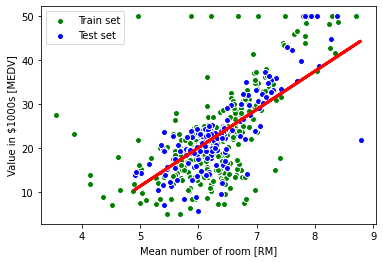

In [112]:
import matplotlib.pyplot as plt

print("RM Weight: "+ str(ll.coef_[0]))
print("Bias: "+str(ll.intercept_))


plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

plt.xlabel('Mean number of room [RM]')
plt.ylabel('Value in $1000s [MEDV]')

plt.legend(loc='upper left')

plt.plot(X_test, Y_pred, color='red', linewidth=3)

## Multiple Linear Regression

We use Boston dataset described as follow:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per $10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

our goal is to predict medv using 2 or more features.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


First step is to find correlation between different features, we can use *DataFrame.corr(method='pearson', min_periods=1)* method in pandas:
* **method**: 
  * [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
  * [Kendall](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
  * [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
* **min_periods**: minimum number of observations required per pair of columns to have a valid result

Keep in mind that -1 means inverse correlation, 0 means no correlation and 1 means positive correlation

In [114]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


we can visualize this table with a heatmap

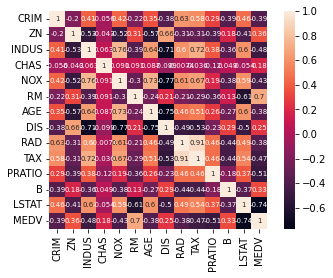

In [115]:
import seaborn as sns

hm = sns.heatmap(boston.corr(),
                 cbar=True, #bar with color intensity
                 square=True, #force cell to be squared
                 yticklabels=boston.columns, #labels on y
                 xticklabels=boston.columns,#labels on x
                 annot=True, #numbers in cell
                    annot_kws={'size':7} #number annotation size
                ) 
plt.show()

we can observe that most correlated features (with MEDV) are LM and LSTAT, we can built multiple regression model with these 2 features:

In [116]:
X = boston[["RM","LSTAT"]].values #regression variable
Y = boston["MEDV"].values #target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R2 score: 0.6069792285352371


Now we want to try to build regression with all variables and not only with most correlated ones

In [117]:
from sklearn.preprocessing import StandardScaler

X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

#splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#variable standardization
ss = StandardScaler() 
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test) #only trasform because variable is already fitted

#regression
ll = LinearRegression()
ll.fit(X_train_std, Y_train)
Y_pred = ll.predict(X_test_std)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 27.195965766883205
R2 score: 0.6733825506400195


we can observe that score is better than before. We can try to understand what variables were more impactful in regression:
with *zip()* we merge arguments in tuple, with *list()* we create a list of tuple, *LinearRegression* has a lot of attributes:
* **coef_**:  Estimated coefficients for the linear regression problem
* **rank_**:  rank of matrix X, only if x is dense
* **singular_**:  singular values of X, only if X is dense
* **intercept_**:  Independent term in the linear model. Set to 0.0 if fit_intercept = False
* **n_features_in_**:  Number of features seen during fit
* **features_names_in_**: Names of features seen during fit. Defined only when X has feature names that are all strings

In [118]:
weights = pd.DataFrame(data=list(zip(boston.columns, ll.coef_)), columns=['feature', 'weight'])
weights

,feature,weight
0,CRIM,-1.011901
1,ZN,1.050280
2,INDUS,0.079210
3,CHAS,0.618962
4,NOX,-1.873691
5,RM,2.705270
6,AGE,-0.279573
7,DIS,-3.097665
8,RAD,2.096900
9,TAX,-1.886063


## Polynomial Regression with SciKit-Learn

With polynomial regression we can find correlation between independent and dependent variables trough a polynomial independent variable

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

#first try with only 1 variable
X = boston[['LSTAT']].values
Y = boston['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

for polynomial regression there are more parameters, for example the degree. We have to import *class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')* from sklearn:
* **degree**: If a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features. Note that min_degree=0 and min_degree=1 are equivalent as outputting the degree zero term is determined by include_bias
* **interaction_only**: If True, only interaction features are produced: features that are products of at most degree distinct input features
* **include_bias**: If True (default), then include a bias column, the feature in which all polynomial powers are zero
* **order**: *{F,C}* Order of output array in the dense case. 'F' order is faster to compute, but may slow down subsequent estimators

The rest of process is equal to the multiple or simple version, we try to do 10 different regression to test 10 polynomial degrees

In [120]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,11):
    #create regression function
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    #polynomial regression
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    
    #check score
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))


DEGREE 1: MSE=39.81715050474416 R2=0.5218049526125568
DEGREE 2: MSE=33.60239474228596 R2=0.5964427754767518
DEGREE 3: MSE=32.091676573441816 R2=0.6145861618613053
DEGREE 4: MSE=29.843976067638522 R2=0.6415805408226356
DEGREE 5: MSE=29.84701333665813 R2=0.6415440639029076
DEGREE 6: MSE=29.5482979569237 R2=0.6451315686177527
DEGREE 7: MSE=29.67171081021597 R2=0.6436494079286977
DEGREE 8: MSE=31.82327509909759 R2=0.6178096033712046
DEGREE 9: MSE=30.460452196211786 R2=0.6341768007814894
DEGREE 10: MSE=35.37825532046339 R2=0.5751150882221386


You can note that performance increase until *degree 4*, after degree 4 it decrease.


Now we can use all features and not only one of them:

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])

X = boston.drop(['MEDV'], axis=1).values
Y = boston['MEDV'].values

#create sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scores = []

#loop to try polynomial regression in different degrees
for i in range(1,6):
    #create regression function
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    #polynomial regression
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    
    #check score
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=27.195965766883198 R2=0.6733825506400196
DEGREE 2: MSE=29.004173799742382 R2=0.6516663777095527
DEGREE 3: MSE=85912.07676339304 R2=-1030.7847736022554
DEGREE 4: MSE=546667.2171232016 R2=-6564.3506713456045
DEGREE 5: MSE=14811.522412351813 R2=-176.88306225004337


we can observe we obtain best result with first degree. Other results are bad, this is overfitting: complexity of the model is too high and it will not be adapted to a generic model (works only for X_train case) 

# Overfitting and Regularization 

Overfitting manifests when model fit to strictly with test set and can not be generalized to a different model:
* **High variance** between different predictions, so they will be very different from each other
* **Low Bias** so the error for the single prediction is very low

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#we build sets
X = boston.drop('MEDV',axis=1).values
Y = boston['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [4]:
#we create polynomial features
polyfeats = PolynomialFeatures(degree=2)
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.transform(X_test)

print("Number of examples in test set: "+str(X_train_poly.shape[0]))
print("Number of features: "+str(X_train_poly.shape[1]))

Number of examples in test set: 354
Number of features: 105


In [ ]:
#Standardization (MANDATORY FOR REGULARIZATION)
ss = StandardScaler()
X_train_poly = ss.fit_transform(X_train_poly)
X_test_poly = ss.transform(X_test_poly)

We can create a function to recognize overfitting, keep in mind that overfitting store test set data instead of learn from it, so MSE should be very low for train set predict and very high for test set. 

In [5]:
def overfit_eval(model, X, Y):
    
    """
    model: predictive model already trained
    X: a tupla containing X information of train set and test set (X_train, X_test)
    Y: a tupla containing target information of train set and test set (Y_train, Y_test)
    """
    
    Y_pred_train = model.predict(X[0])
    Y_pred_test = model.predict(X[1])
    
    mse_train = mean_squared_error(Y[0], Y_pred_train)
    mse_test = mean_squared_error(Y[1], Y_pred_test)

    r2_train = r2_score(Y[0], Y_pred_train)
    r2_test = r2_score(Y[1], Y_pred_test)    
    
    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))   

In [6]:
#Regression
ll = LinearRegression()
ll.fit(X_train_poly, Y_train)

overfit_eval(ll, (X_train_poly, X_test_poly),(Y_train, Y_test))

Train set:  MSE=4.123989217497917 R2=0.9513476919918851
Test set:  MSE=29.004173799742382 R2=0.6516663777095527


On train set MSE is very low and R2 is very high, on test set performance are bad -> overfitting

## L2 Regulation: Ridge Regression

This regulation works adding a penalty to weights of cost function during train phase. $$\alpha  \sum_{j=1}^{M}W_j^2$$
$\Alpha$ is the penalty parameter, best values for $\alpha$ are power of 10

In [7]:
from sklearn.linear_model import Ridge

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10] #alpha

for alpha in alphas:
    print("Alpha="+str(alpha))
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, Y_train)

    overfit_eval(ridge, (X_train_poly, X_test_poly),(Y_train, Y_test))

Alpha=0.0001
Train set:  MSE=4.092050424281049 R2=0.9517244863827146
Test set:  MSE=29.26663162187659 R2=0.6485143181296559
Alpha=0.001
Train set:  MSE=4.092423597563994 R2=0.9517200839120619
Test set:  MSE=29.60591683046999 R2=0.6444395788691996
Alpha=0.01
Train set:  MSE=4.103565799616381 R2=0.9515886350120886
Test set:  MSE=31.515751179987774 R2=0.6215028966683723
Alpha=0.1
Train set:  MSE=4.186034070303276 R2=0.9506157246830966
Test set:  MSE=32.099767939612576 R2=0.6144889863683229
Alpha=1
Train set:  MSE=4.438560434760282 R2=0.9476365727465196
Test set:  MSE=29.909133436966624 R2=0.6407980154304738
Alpha=10
Train set:  MSE=4.993224161313832 R2=0.941092988599715
Test set:  MSE=21.366403813403693 R2=0.7433942822494933


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.36657e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.36657e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## L1 Regularization: Lasso
The only difference between L1 and L2 regularization is the weights sum, in L1 the sum is in module and not squared.
$$\alpha  \sum_{j=1}^{M} |W_j|$$

In [8]:
from sklearn.linear_model import Lasso

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10] #alpha is a power of 10

for alpha in alphas:
    print("Alpha="+str(alpha))
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly, Y_train)

    overfit_eval(lasso, (X_train_poly, X_test_poly),(Y_train, Y_test))

Alpha=0.0001
Train set:  MSE=5.394068365290135 R2=0.9363640733076051
Test set:  MSE=29.578033804087994 R2=0.6447744477624534
Alpha=0.001
Train set:  MSE=5.410455513615849 R2=0.9361707477323745
Test set:  MSE=28.075283291590633 R2=0.6628221443812649
Alpha=0.01


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.587e+02, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.813e+02, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+03, toleranc

Train set:  MSE=5.554901344330457 R2=0.9344666639737174
Test set:  MSE=24.897165410687123 R2=0.7009906273439133
Alpha=0.1
Train set:  MSE=6.5142302859634915 R2=0.9231490865776866
Test set:  MSE=17.627180147945058 R2=0.7883015198400687
Alpha=1
Train set:  MSE=7.912515471829987 R2=0.9066529712975318
Test set:  MSE=20.578625301071533 R2=0.7528553254999539
Alpha=10
Train set:  MSE=9.873591524755371 R2=0.8835173928267056
Test set:  MSE=21.153689577897172 R2=0.7459489325104632


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+03, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.095e+03, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(


## L1 + L2 Regularization: ElasticNet

*class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')*:

* **alpha: float, default=1.0**: Constant that multiplies the penalty terms
* **l1_ratio: float, default=0.5**: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty
* **fit_intercept: bool, default=True**: Whether the intercept should be estimated or not
* **normalize: bool, default=False**: This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm
* **precompute: bool or array-like of shape (n_features, n_features), default=False**: Whether to use a precomputed Gram matrix to speed up calculations
* **max_iter: int, default=1000**: The maximum number of iterations
* **copy_X: bool, default=True**: If True, X will be copied; else, it may be overwritten
* **tol: float, default=1e-4**: The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol
* **warm_start: bool, default=False**: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution
* **positive: bool, default=False**: When set to True, forces the coefficients to be positive
* **random_state: int, RandomState instance, default=None**: The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls
* **selection: {‘cyclic’, ‘random’}, default=’cyclic’**: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4


In [10]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train_poly, Y_train)
    overfit_eval(elastic, (X_train_poly, X_test_poly),(Y_train, Y_test))

Lambda is: 0.0001
Train set:  MSE=5.406254278214403 R2=0.9362203113437192
Test set:  MSE=28.37277958481279 R2=0.659249280622016
Lambda is: 0.001
Train set:  MSE=5.493351970912163 R2=0.9351927859190774
Test set:  MSE=26.237609365499885 R2=0.6848921960808442
Lambda is: 0.01
Train set:  MSE=5.624518652229553 R2=0.9336453614610358
Test set:  MSE=24.25370565701346 R2=0.7087184346706387
Lambda is: 0.1
Train set:  MSE=6.310832728820977 R2=0.9255486468277979
Test set:  MSE=18.38457175830812 R2=0.7792054164670946
Lambda is: 1
Train set:  MSE=7.432788317608775 R2=0.9123124994961015
Test set:  MSE=19.151773695552336 R2=0.7699914932685341
Lambda is: 10
Train set:  MSE=9.21799480356295 R2=0.8912517228470725
Test set:  MSE=21.17108193833971 R2=0.7457400541623


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.651e+02, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.939e+02, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+03, toleranc

# Supervisioned learning - Classification

## Logistic regression

Logistic Regression is a linear classification model that allow binomial classification i.e. between two classes.
The problem could be reduced as find coefficient of a rect who best divide two classes.

![Linear classification](img/2.png)

In this chapter we will use [Wisconsin breast cancer dataset ](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), the goal is to recognize malign cancer.

*class sklearn.linear_model.LogisticRegression(penalty='l2', \*, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)*:
* **penalty{'l1', 'l2', 'elasticnet', 'none'}, default='l2'**: Specify the norm of the penalty
  * *none*
  * *l2*
  * *l1*
  * *elasticnet*
* **dualbool, default=False**: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features
* **tolfloat, default=1e-4**:Tolerance for stopping criteria
* **Cfloat, default=1.0**: Inverse of regularization strength ($\alpha$); must be a positive float. Like in support vector machines, smaller values specify stronger regularization
* **fit_interceptbool, default=True**: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function
* **intercept_scalingfloat, default=1**: Useful only when the solver 'liblinear' is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a "synthetic" feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight
* **class_weightdict or 'balanced', default=None**: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified
* **random_stateint, RandomState instance, default=None**: Used when solver == 'sag', 'saga' or 'liblinear' to shuffle the data
* **solver{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'**: Algorithm to use in the optimization problem. Default is 'lbfgs'. To choose a solver, you might want to consider the following aspects
  * For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;
  * For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss;
  * 'liblinear' is limited to one-versus-rest schemes.
* **max_iterint, default=100**: Maximum number of iterations taken for the solvers to converge
* **multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’**: If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’
* **verboseint, default=0**: For the liblinear and lbfgs solvers set verbose to any positive number for verbosity
* **warm_startbool, default=False**: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.
* **n_jobsint, default=None**: Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”
* **l1_ratiofloat, default=None**: The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2

Methods:

* **decision_function(X)**: Predict confidence scores for samples
* **densify()**: Convert coefficient matrix to dense array format
* **fit(X, y[, sample_weight])**: Fit the model according to the given training data
* **get_params([deep])**: Get parameters for this estimator
* **predict(X)**: Predict class labels for samples in X
* **predict_log_proba(X)**: Predict logarithm of probability estimates
* **predict_proba(X)**: Probability estimates
* **score(X, y[, sample_weight])**: Return the mean accuracy on the given test data and labels
* **set_params(\*\*params)**:  Set the parameters of this estimator
* **sparsify()**: Convert coefficient matrix to sparse format

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can take a look at info() and we can note that there are 32 columns, 1 target (diagnosis) who tell whether a tumor is benign (**B**) or malignant (**M**)

In [13]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can start with logistic regression with 2 features only

In [18]:
X = breast_cancer[["radius_se","concave points_worst"]].values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#conversion of M and B in 1 and 0 respectively, we use Y_train and Y_test entirely because this is the target
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

#dataframe standardization
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

lr = LogisticRegression()
lr.fit(X_train, Y_train) #train the model

Y_pred = lr.predict(X_test) #predict absolutely (boolean)
Y_pred_proba = lr.predict_proba(X_test) #predict with probability of belonging

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred))) # % of correct occurrence
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba))) # the smaller the better, 

ACCURACY: 0.9064327485380117
LOG LOSS: 0.21521128199037198


we can show decision boundary in a plot, decision bundary is the border between two classes

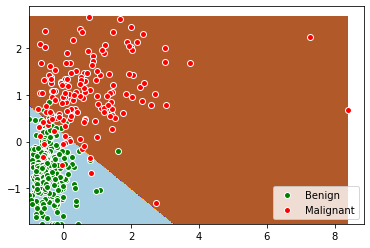

In [22]:
def showBounds(model, X, Y, labels=["Negative","Positive"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()
    
showBounds(lr, X_train, Y_train, labels=["Benign","Malignant"]) #for train



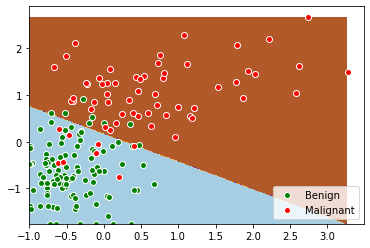

In [23]:
showBounds(lr, X_test, Y_test, labels=["Benign","Malignant"]) #for test

Now we can try logistic regression with all features:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

X = breast_cancer.drop(["diagnosis"], axis=1).values # all features a part of target
Y = breast_cancer['diagnosis'].values
breast_cancer
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#conversion of M and B in 1 and 0 respectively, we use Y_train and Y_test entirely because this is the target
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

#dataframe standardization
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

lr = LogisticRegression()
lr.fit(X_train, Y_train) #train the model

Y_pred = lr.predict(X_test) #predict absolutely (boolean)
Y_pred_proba = lr.predict_proba(X_test) #predict with probability of belonging

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred))) # % of correct occurrence
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba))) # the smaller the better, 

ACCURACY: 0.9649122807017544
LOG LOSS: 0.11068153613898739


P.s. Logistic regression automatically include Regularization with L2 and L1

## Multiclass Classification

we explore *One vs Rest* classification, OvR allow us to complete multiclass classification as a sum of single binomial classification.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

#we use load_digits to load dataset
digits = load_digits()
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

array([0, 1, 2, ..., 8, 9, 8])

The dataset is a list of handwritten numbers, we can show them with matplotlib: 

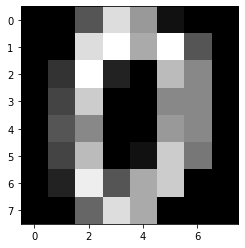

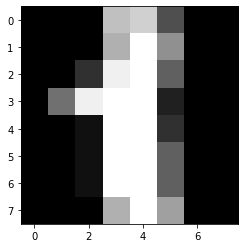

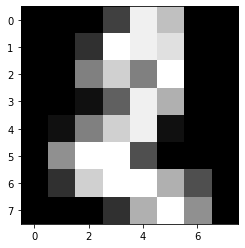

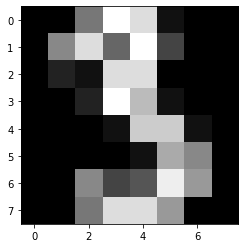

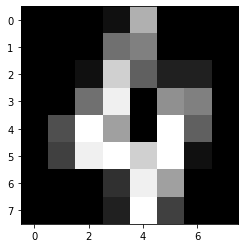

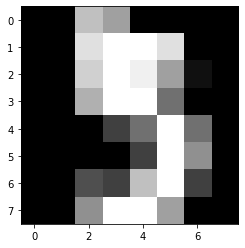

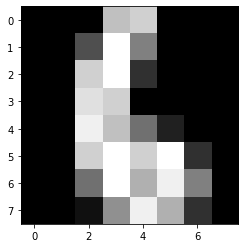

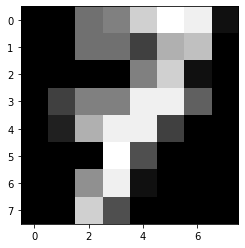

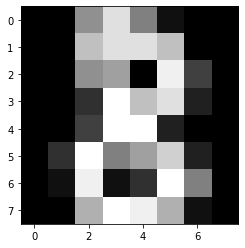

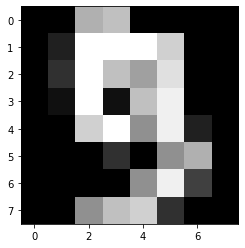

In [2]:
for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8]) # we select first example of current class and we use reshape to obtain 8x8 matrix
    plt.imshow(pic_matrix, cmap="gray") #show matrix scale of gray
    plt.show()

When you work with image best practice si to normalize data

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#now we execute logistic regression, scikit learn recognize automatically when OvR is necessary
lr = LogisticRegression()
lr.fit(X_train, Y_train)

y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: 0.9592592592592593
LOG LOSS: 0.1773581383767746


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


if you want to use specific class you can use *OneVsRestClassifier()*:

In [11]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(LogisticRegression()) # ovR require a classifier, in this case we use LogisticRegression as  a Classifier
ovr.fit(X_train, Y_train)

y_pred_proba = ovr.predict_proba(X_test)
y_pred = ovr.predict(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: 0.9574074074074074
LOG LOSS: 0.22839278150427528


# Non Linear Classification

Non-Linear Classification refers to categorizing those instances that are not linearly separable.

![Linear vs Non Linear](img/3.png)

## K-Nearest Neighbors - KNN
 It's a simple model that allow to classify elements searching most similar k examples inside the dataset.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

digits = load_digits()

X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#now we create KNN model with different K values to compare results

from sklearn.neighbors import KNeighborsClassifier

Ks = [1,2,3,4,5,7,10,12,15,20]

for K in Ks:
    print("K="+str(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,Y_train)
    
    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    accuracy_train = accuracy_score(Y_train, y_pred_train)
    accuracy_test = accuracy_score(Y_test, y_pred)

    loss_train = log_loss(Y_train, y_prob_train)
    loss_test = log_loss(Y_test, y_prob)
    
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

K=1
ACCURACY: TRAIN=1.0000 TEST=0.9889
LOG LOSS: TRAIN=0.0000 TEST=0.3838
K=2
ACCURACY: TRAIN=0.9897 TEST=0.9833
LOG LOSS: TRAIN=0.0099 TEST=0.2060
K=3
ACCURACY: TRAIN=0.9912 TEST=0.9889
LOG LOSS: TRAIN=0.0164 TEST=0.1509
K=4
ACCURACY: TRAIN=0.9889 TEST=0.9796
LOG LOSS: TRAIN=0.0233 TEST=0.1557
K=5
ACCURACY: TRAIN=0.9897 TEST=0.9870
LOG LOSS: TRAIN=0.0295 TEST=0.1629
K=7
ACCURACY: TRAIN=0.9897 TEST=0.9796
LOG LOSS: TRAIN=0.0422 TEST=0.1773
K=10
ACCURACY: TRAIN=0.9825 TEST=0.9741
LOG LOSS: TRAIN=0.0584 TEST=0.1326
K=12
ACCURACY: TRAIN=0.9809 TEST=0.9741
LOG LOSS: TRAIN=0.0668 TEST=0.1449
K=15
ACCURACY: TRAIN=0.9801 TEST=0.9685
LOG LOSS: TRAIN=0.0825 TEST=0.1587
K=20
ACCURACY: TRAIN=0.9745 TEST=0.9593
LOG LOSS: TRAIN=0.1076 TEST=0.1854


With *K=3* we obtain best result.

Let's see wrong predictions:

In [14]:
Y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

Numero 2 classificato come 7


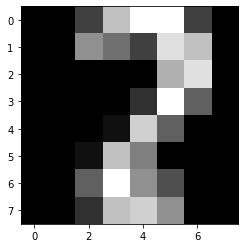

Numero 9 classificato come 7


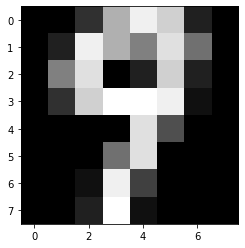

Numero 2 classificato come 0


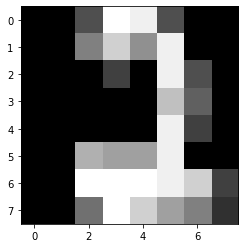

Numero 8 classificato come 3


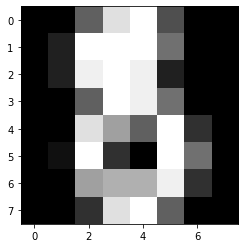

Numero 8 classificato come 1


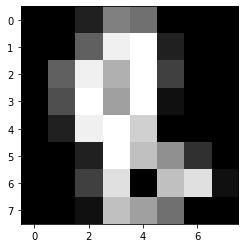

Numero 8 classificato come 7


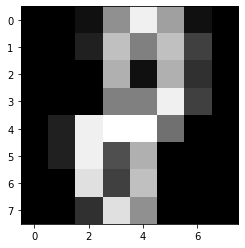

Numero 8 classificato come 1


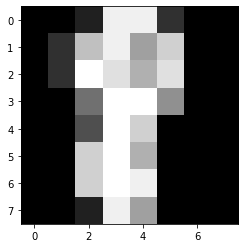

Numero 8 classificato come 3


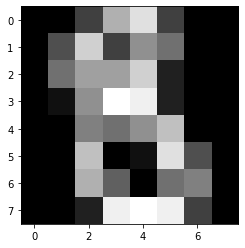

Numero 5 classificato come 9


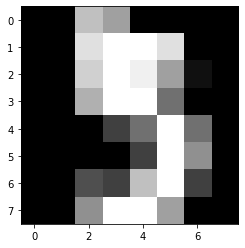

Numero 2 classificato come 8


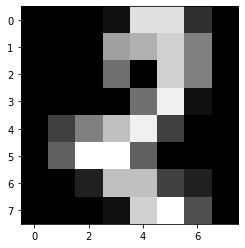

Numero 8 classificato come 1


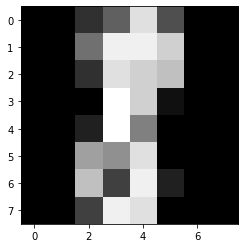

Numero 3 classificato come 2


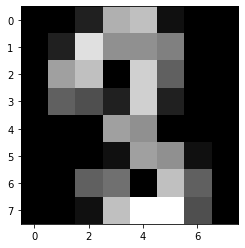

Numero 9 classificato come 5


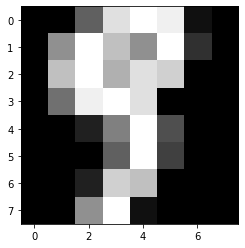

Numero 4 classificato come 7


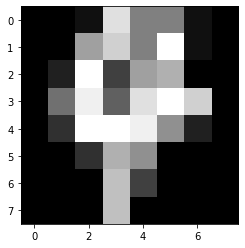

Numero 3 classificato come 8


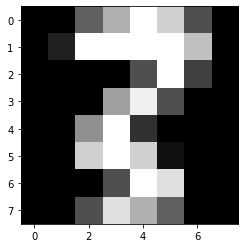

Numero 8 classificato come 1


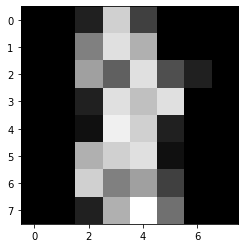

Numero 1 classificato come 6


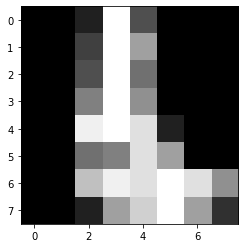

Numero 3 classificato come 9


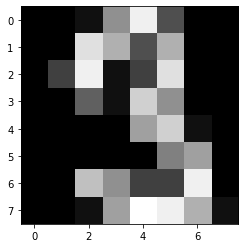

Numero 2 classificato come 8


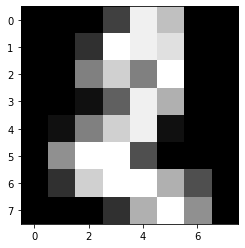

Numero 5 classificato come 6


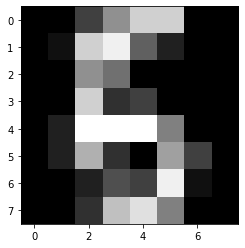

Numero 2 classificato come 1


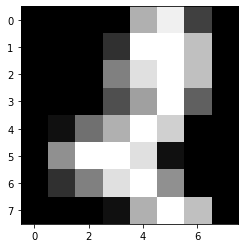

Numero 3 classificato come 8


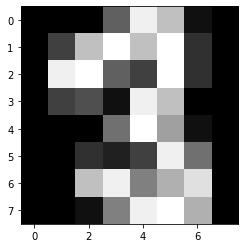

In [17]:
for i in range(0,len(X_test)):
    if(Y_test[i]!=y_pred[i]):
        print("Numero %d classificato come %d" % (Y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([8,8]), cmap="gray")
        plt.show()

## Decision Tree and Random Forest

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

titanic = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [19]:
titanic = titanic.drop("Name",axis=1) #drop name column because it's influent

#one hot enconding for sex
titanic = pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


Now we can create testset and trainset

In [20]:
X = titanic.drop("Survived", axis=1).values
Y = titanic["Survived"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

(620, 7)

### Decision tree
This method predict learning questions sequence from data:

[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision+tree+classifier)


In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini") #gini is default value, we could omit this parameter, other criterion are "entropy" and "log_loss"
tree.fit(X_train, Y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))


ACCURACY: TRAIN=0.9806 TEST=0.7903


The decision tree suffer overfitting, we can limit max-depth with *max-depth* parameter:

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6) #limit depth
tree.fit(X_train, Y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))

ACCURACY: TRAIN=0.8935 TEST=0.8090


You can plot decision tree with graphviz, after file *.dot* creation, open, copy and paste content in [this site](http://webgraphviz.com/) to show it

In [23]:
from sklearn.tree import export_graphviz

dotfile = open("tree.dot", 'w')
export_graphviz(tree, out_file = dotfile, feature_names = titanic.columns.drop("Survived"))
dotfile.close()

### Random Forest
with this model you can create multiple decision tree and you can put them together to make your model more robust:

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=30, max_depth=8, random_state=False)

forest.fit(X_train, Y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))

ACCURACY: TRAIN=0.9161 TEST=0.8577


## Support Vector Machine - SVM
This type of model exclude outliers, the greater the margin the better the result, the particularity of this machine is that it learn by promiscuous example, it totally ignore ideal one: it learn from difficult example. 

Following code is just useless function to plot future examples, you can ignore it.

In [51]:
#begin ignoring#

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def show_bounds(model,X,Y,labels=["Classe 0","Classe 1"], figsize=(12,10)):

    plt.figure(figsize=figsize)

    h = .02

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()


def plot_bounds(X,Y,model=None,classes=None, figsize=(8,6)):
        
    plt.figure(figsize=figsize)
        
    if(model):
        X_train, X_test = X
        Y_train, Y_test = Y
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)
    
    plt.show()

#end ignoring#

Following code is an example of SVM

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
X = iris.drop("class",axis=1).values
Y = iris["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

As you can see *Target* contain nominal value, so we must encode them:

In [55]:
le = LabelEncoder() #Encoding
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler() #Standardization
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

We can train SVM:

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC)

We are going to make SVM with only 2 features:

In [56]:
X2_train = X_train[:,:2] #comma mean that we consider column
X2_test = X_test[:,:2]

from sklearn.svm import LinearSVC

svc = LinearSVC() #Train SVM
svc.fit(X2_train, Y_train)
print("ACCURACY with 2 properties: Train=%.4f Test=%.4f" % (svc.score(X2_train, Y_train), svc.score(X2_test,Y_test)))

ACCURACY with 2 properties: Train=0.8286 Test=0.6889


we use upper function to plot result:

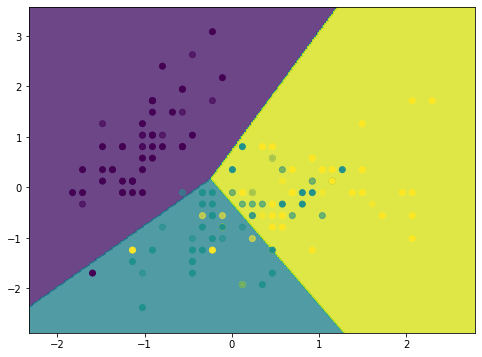

In [57]:
plot_bounds((X2_train,X2_test),(Y_train,Y_test),svc)

the model is overfitted, it should be good for purple category but i is bad for the others. We try now with all features:

In [58]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train)
print("ACCURACY con tutte le proprietà: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY con tutte le proprietà: Train=0.9429 Test=0.9556


## Kernel SVM
The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

![](img/4.jpg)

There are a lot of different Kernel Functions:
* Linear: simple Linear SVM
* Gaussian (RBF): most generic one
* Sigmoid: Alternative to RBF when RBF is not good
* Polynomial: Alternative to RBF

let's try, first step, as usual, is to load data:

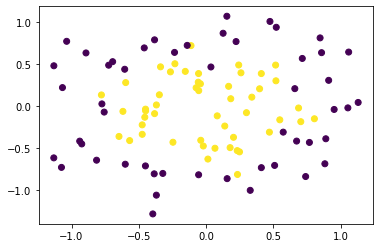

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles

X, y = make_circles(noise=0.2, factor=0.5, random_state=1) #another default data set in scikit-learn

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y) #plot data set, column 0 (x-coordinate) and column 1 (y-coordinate)

### Linear SVM

ACCURACY: Train=0.5143 Test=0.4667


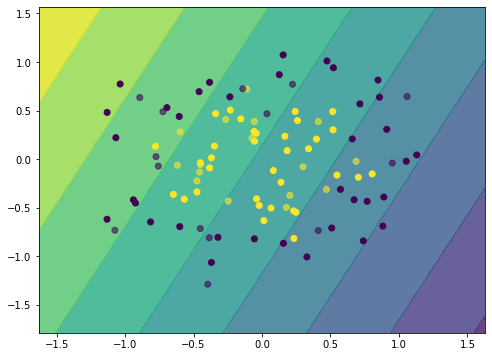

In [66]:
from sklearn.svm import SVC

svc = SVC(kernel="linear",probability=True) #equal to LinearSVC
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

### RBF SVM

ACCURACY: Train=0.9143 Test=0.8667


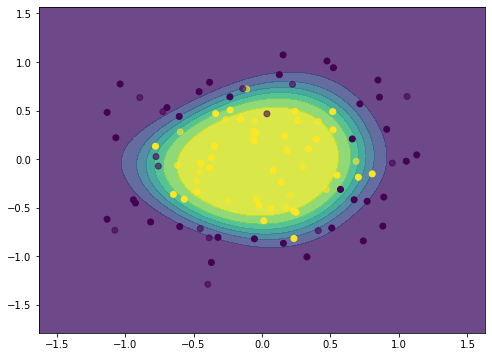

In [67]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf",probability=True) #Gaussian SVC
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

### Sigmoid SVM


ACCURACY: Train=0.4714 Test=0.4333


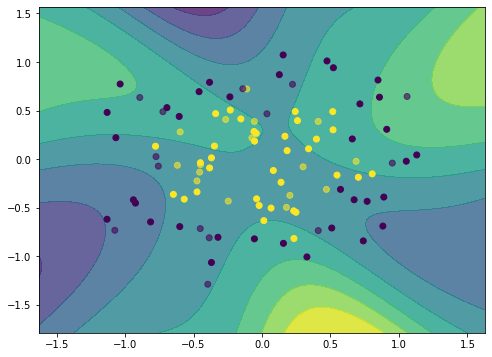

In [68]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid",probability=True)
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

### Polynomial SVM

ACCURACY: Train=0.5143 Test=0.4667


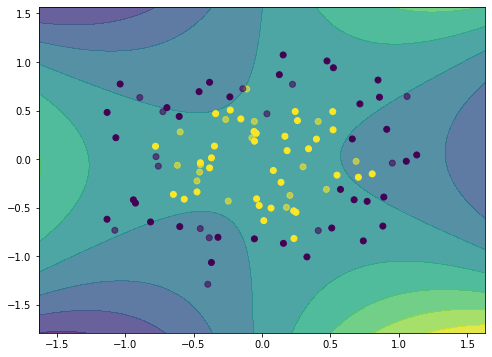

In [69]:
from sklearn.svm import SVC

svc = SVC(kernel="poly",probability=True)
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test, Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

# Deep Learning

Percettron is a simple neuron, to train it we can use Gradient Descend:
1. we calc cost function with weights on every parameter
2. we test result on test set
3. we adjust weights to minimize error and maximize score
4. every loop is called epoch, in every epoch we adjust weights

![](img/4.png)

Gradient descend need to know every single weight to correctly work, if we add more than one perceptron we loose information about weights. For this reason Neural Network use Backward induction to get this information.

Neural network is composed by a lot of layers and a lot of perceptron for every layer, Neural network with only 1 hidden layer is called Vanilla Neural Network while a multi layer neural network is called Deep Neural Network.

![](img/5.png)

To correctly train a Deep neural network we need large dataset and we use MNIST dataset, a dataset containing handwritten digits (60k for train and 10k for test)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

#import dataset from localdirectory
import os
import struct

def load_mnist(path="/"):
    
    train_labels_path = os.path.join(path,"train-labels.idx1-ubyte")
    train_images_path = os.path.join(path,"train-images.idx3-ubyte")
    
    test_labels_path = os.path.join(path,"t10k-labels.idx1-ubyte")
    test_images_path = os.path.join(path,"t10k-images.idx3-ubyte")
    
    labels_path = [train_labels_path, test_labels_path]
    images_path = [train_images_path, test_images_path]
        
    labels = []
    images = []
        
    for path in zip(labels_path, images_path):
        
        with open(path[0],'rb') as lbpath:
            magic, n = struct.unpack('>II', lbpath.read(8))
            lb = np.fromfile(lbpath, dtype=np.uint8)
            labels.append(lb)
            
        with open(path[1], 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
            images.append(np.fromfile(imgpath, dtype=np.uint8).reshape(len(lb), 784))
            
    return images[0], images[1], labels[0], labels[1]

You have to download dataset from [This site](http://yann.lecun.com/exdb/mnist/)

In [6]:

X_train, X_test, Y_train, Y_test = load_mnist(path="data")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))


Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


every image si 28x28 so every example has 784 properties. Now we normalize:

In [7]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Vanilla Network
we start creating vanilla network, we use [MLPClassifier](sklearn.neural_network.MLPClassifier)

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), verbose=True) #hidden_layer_size represent the ith hidden layer number of neurons 
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.44171001
Iteration 2, loss = 0.20594759
Iteration 3, loss = 0.15263181
Iteration 4, loss = 0.12355321
Iteration 5, loss = 0.10248392
Iteration 6, loss = 0.08694864
Iteration 7, loss = 0.07543848
Iteration 8, loss = 0.06583725
Iteration 9, loss = 0.05846408
Iteration 10, loss = 0.05204946
Iteration 11, loss = 0.04681766
Iteration 12, loss = 0.04110156
Iteration 13, loss = 0.03721248
Iteration 14, loss = 0.03302022
Iteration 15, loss = 0.02989244
Iteration 16, loss = 0.02651886
Iteration 17, loss = 0.02422051
Iteration 18, loss = 0.02171409
Iteration 19, loss = 0.01932239
Iteration 20, loss = 0.01751746
Iteration 21, loss = 0.01499896
Iteration 22, loss = 0.01386704
Iteration 23, loss = 0.01198520
Iteration 24, loss = 0.01107820
Iteration 25, loss = 0.00973665
Iteration 26, loss = 0.00935885
Iteration 27, loss = 0.00761214
Iteration 28, loss = 0.00733347
Iteration 29, loss = 0.00621245
Iteration 30, loss = 0.00576992
Iteration 31, loss = 0.00542182
Iteration 32, los

## Deep neural network

Now we tray with a deep neural network, classifier is the same but parameters change a little bit

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512,512,), verbose=True)
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.24055035
Iteration 2, loss = 0.08445546
Iteration 3, loss = 0.05559034
Iteration 4, loss = 0.03582679
Iteration 5, loss = 0.02548779
Iteration 6, loss = 0.01971831
Iteration 7, loss = 0.01811101
Iteration 8, loss = 0.01440783
Iteration 9, loss = 0.01323993
Iteration 10, loss = 0.01341571
Iteration 11, loss = 0.01188339
Iteration 12, loss = 0.01083841
Iteration 13, loss = 0.00857186
Iteration 14, loss = 0.01050910
Iteration 15, loss = 0.00882519
Iteration 16, loss = 0.01052998
Iteration 17, loss = 0.00891596
Iteration 18, loss = 0.00667429
Iteration 19, loss = 0.00837348
Iteration 20, loss = 0.00666463
Iteration 21, loss = 0.00778946
Iteration 22, loss = 0.00919521
Iteration 23, loss = 0.00853162
Iteration 24, loss = 0.00434974
Iteration 25, loss = 0.00767713
Iteration 26, loss = 0.00578206
Iteration 27, loss = 0.00606724
Iteration 28, loss = 0.00547955
Iteration 29, loss = 0.00967123
Iteration 30, loss = 0.00695688
Iteration 31, loss = 0.00567690
Iteration 32, los

# Validation and Optimization

## Full Batch, Stochastic and Mini Batch Gradient Descend

### Full Batch Gradient Descend

So far we have been using full batch Gradient Descend: we applied Gradient Descend with entire test set, this is a problem in real applications because:
1. Inefficient for big data
2. Less Dynamic: if we obtain new data we have to re train on entire dataset
3. Local Minimum problem: when there are a lot of local minimum (common in big data set) the risk is that machine could block on local minimum instead of find global minimum.

There are 2 alternatives to this method to fix these problems:
* **Stochastic method**: Gradiend descend on one example a time
* **Mini batch method**: Gradient Descend on a *batch_size* examples a time

Let's take a deep look to gradient descend methods comparison, we start with **Full Batch Gradient Descend**

with *partial_fit* we can train only part of the data, we can simulate stochastic gradient descend to see cost function fluctuation


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

X, Y = make_classification(n_samples=1250, n_features=4, n_informative=2, random_state=0) #create classification problem ad hoc
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

epochs = 200

n_batches=1

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
full_losses = []

for epoch in range(epochs):
        loss = 0.
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            full_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

Loss all'epoca 1 = 0.6238
Loss all'epoca 2 = 0.3485
Loss all'epoca 3 = 0.5827
Loss all'epoca 4 = 0.7230
Loss all'epoca 5 = 0.1958
Loss all'epoca 6 = 0.1542
Loss all'epoca 7 = 0.2547
Loss all'epoca 8 = 0.1486
Loss all'epoca 9 = 0.1500
Loss all'epoca 10 = 0.1530
Loss all'epoca 11 = 0.1555
Loss all'epoca 12 = 0.1360
Loss all'epoca 13 = 0.1238
Loss all'epoca 14 = 0.1312
Loss all'epoca 15 = 0.1320
Loss all'epoca 16 = 0.1361
Loss all'epoca 17 = 0.1174
Loss all'epoca 18 = 0.1161
Loss all'epoca 19 = 0.1798
Loss all'epoca 20 = 0.1150
Loss all'epoca 21 = 0.1425
Loss all'epoca 22 = 0.1164
Loss all'epoca 23 = 0.1288
Loss all'epoca 24 = 0.1278
Loss all'epoca 25 = 0.1258
Loss all'epoca 26 = 0.1138
Loss all'epoca 27 = 0.1122
Loss all'epoca 28 = 0.1101
Loss all'epoca 29 = 0.1156
Loss all'epoca 30 = 0.1265
Loss all'epoca 31 = 0.1163
Loss all'epoca 32 = 0.1137
Loss all'epoca 33 = 0.1155
Loss all'epoca 34 = 0.1172
Loss all'epoca 35 = 0.1111
Loss all'epoca 36 = 0.1098
Loss all'epoca 37 = 0.1120
Loss all'e

We can plot the graph of function cost Fluctuation:

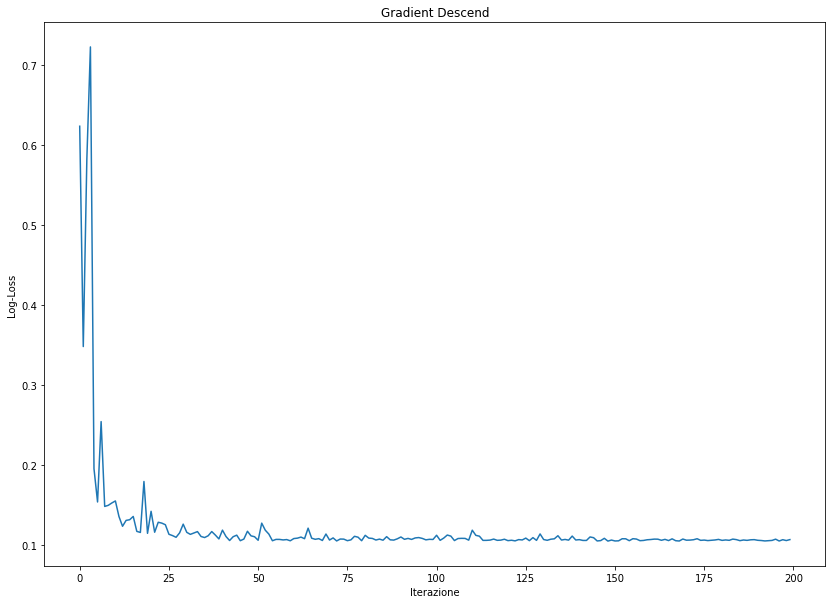

In [20]:
plt.figure(figsize=(14,10))
plt.title("Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(full_losses)


### Stochastic Gradient Descend

[class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)[source]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier)

Alternative to Full Batch Gradient Descend is Stochastic Gradient Descend who train the set only with one example a time. After first iteration a second one began with the second example and so on. Pay attention because at the end of every epoch, train set must be shuffled to avoid loops.

Advantages of Stochastic Gradient Descend:
* less Memory usage
* Dynamic
* less sensitive to local minimum

Disadvantages:
* Costo Function Fluctuation during training may case problems to convergency

Keep in mind the difference between iteration and epoch:
* *Epoch* is a full train set iteration
* *Iteration* is an element only iteration


Let's try with a *stochastic Gradient Descend* Machine with standard method

In [13]:
sgd = SGDClassifier(loss="log", verbose=False, shuffle=True) #verbose show us info about training, shuffle allow to shuffle dataset after every epoch
sgd.fit(X_train,Y_train)
print("LOSS: %.4f" % (log_loss(Y_test, sgd.predict_proba(X_test))))

LOSS: 0.3550


and now we tray step by step building manually a stochastic machine to look deeply inside cost function fluctuation

In [16]:
from sklearn.utils import shuffle

epochs = 5 #set epoch only for this example

n_batches=X_train.shape[0]
batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y_train)

sgd = SGDClassifier(loss="log")
sgd_losses = []

for epoch in range(epochs): # 5 times
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train) #in this simulation we have to shuffle data manually
        for batch in range(n_batches): # 6000 times
            batch_start = int(batch*batch_size) #first loop = 0*1 = 0
            batch_end = int((batch+1)*batch_size) #first loop = 1*1 = 1
            X_batch = X_shuffled[batch_start:batch_end,:] #[0:1,:]
            Y_batch = Y_shuffled[batch_start:batch_end] #[0:1]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            sgd_losses.append(loss)       
        print("Loss epoch %d = %.4f" % (epoch+1, loss))

Loss epoch 1 = 1.1064
Loss epoch 2 = 0.3939
Loss epoch 3 = 0.3492
Loss epoch 4 = 0.2040
Loss epoch 5 = 0.1608


print fluctuation graph

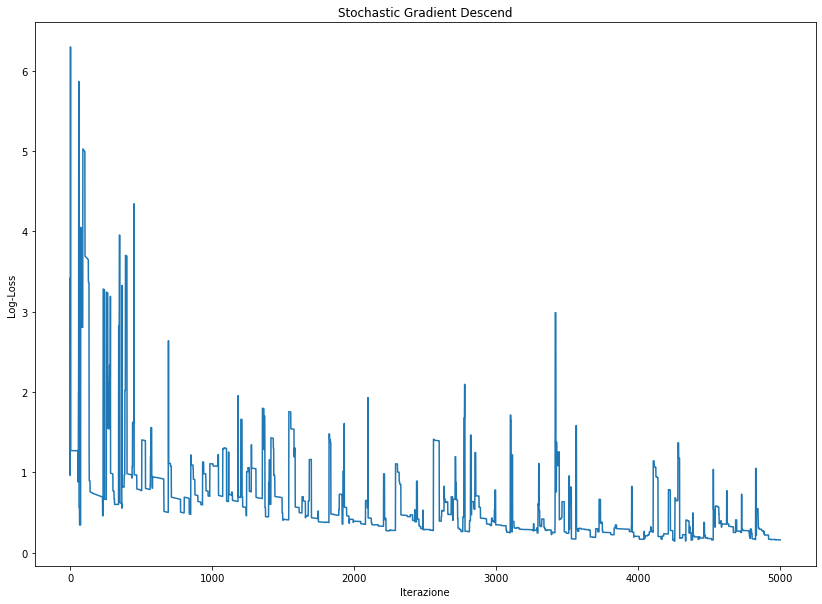

In [17]:
plt.figure(figsize=(14,10))
plt.title("Stochastic Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(sgd_losses)


### Mini Batch Gradient Descend

it is in the middle between stochastic and full gradient descend, cost function will fluctuate but not as in stochastic gradient descend. Batch Size will be another hyper parameter to set.

In [21]:
epochs = 50

n_batches=10

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
batch_losses = []

for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]
            print(X_batch.shape)
            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            batch_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 1 = 0.4790
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 2 = 0.5545
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 3 = 0.2058
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 4 = 0.2279
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 5 = 0.2325
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 6 = 0.3214
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 7 = 0.1545
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 8 = 0.1724
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)


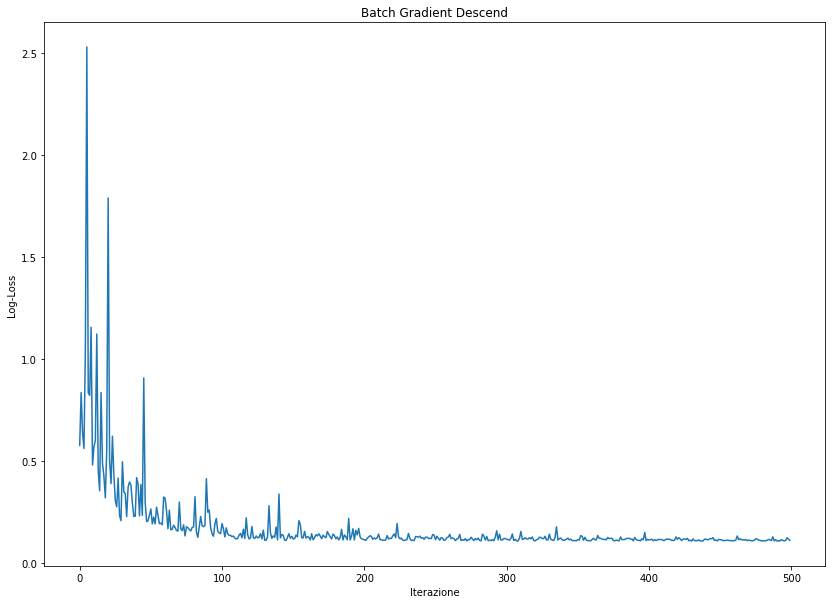

In [22]:
plt.figure(figsize=(14,10))
plt.title("Batch Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(batch_losses)

As we can see fluctuation is maximized with Stochastic Gradient Descend with Batch_size = 1, and minimized with Full Batch Gradient Descend, we will have to set *Batch_size* properly to minimize Fluctuation and to maximize saving of resources.

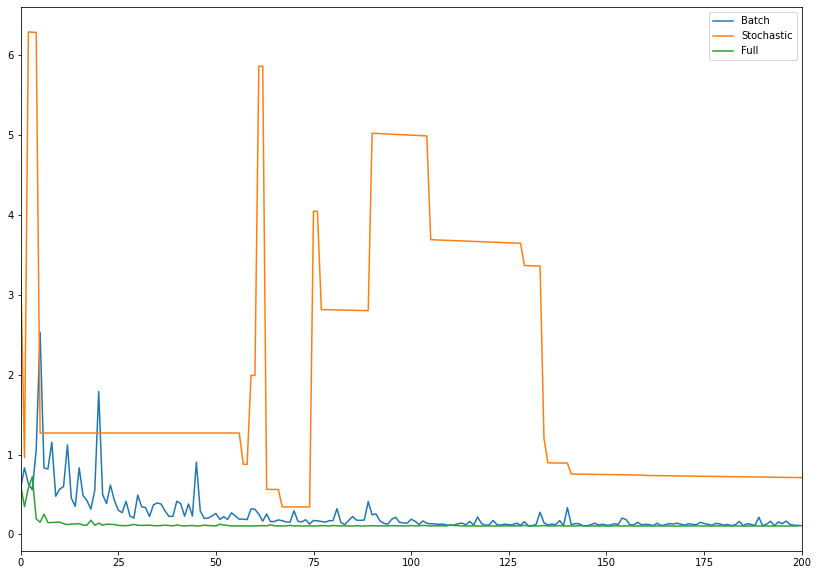

In [23]:
plt.figure(figsize=(14,10))
plt.plot(batch_losses, label="Batch")
plt.plot(sgd_losses, label="Stochastic")
plt.plot(full_losses,label="Full")
plt.xlim(xmin=0,xmax=200)
plt.legend()
plt.show()

## Cross Validation

### Validation set

During iteration * mode -> train -> test* the risk is Data Leakage: Overfitting on Test set, to avoid this type of overfitting we can split Data set in 3 parts: Train part, Validation part and Test part. In this matter we will loop only on *model -> train -> Validation* avoiding overfitting on test. 

problems:
1. first problem is that another subset mean train set reduction (set are not unlimited)
2. Model may be depend on set split

### K-Fold Cross Validation

[class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold)

Alternative to *Validation set* is K-Fold Cross Validation: with this method we split set in 4 parts and then we loop on parts to train and test.

first loop we use first folder as validation set, we train machine with folder 2, 3, 4 and we validate results with folder 1.

Second Loop we use second folder as validation set, we train with folder 1, 3, 4.

Third Loop we use Third Folder as validation set, we train with folders 1, 2, 4.

Last loop we use Forth Folder as validation set, we train with folders 1, 2, 3.

Best practices says that it's a good thing to split set in 5 and use 1/5 of the set as Final Test Set.

![](img/6.png)

step by step:
1. create test sent and train set
2. Choose model type and Hyperparameter to use
3. Train model through cross validation using train set
4. Repeat step 2 and 3 until results are good
5. Train model on entire train set
6. Test model on test set
7. Check the result, if it is not good return to step 2

How many folds we should use? Usually 10 is a good number but
* medium size dataset -> 10 folders
* big size dataset -> 5 folders
* small size dataset -> 20 folders
* very very small size dataset -> *n* folders where *n* is examples number -> **Leave one out cross validation**

We try Cross validation on iris_set

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
X = iris.drop("class",axis=1).values
Y = iris["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

from sklearn.model_selection import KFold

lr = LogisticRegression()

kfold = KFold(n_splits=10, shuffle=True)
scores = []
              
for k, (train, test) in enumerate(kfold.split(X_train)):
    lr.fit(X_train[train], Y_train[train])
    score = lr.score(X_train[test],Y_train[test])
    scores.append(score)
    print("Fold %d: Accuracy=%.2f" %(k, score))

Fold 0: Accuracy=1.00
Fold 1: Accuracy=1.00
Fold 2: Accuracy=0.91
Fold 3: Accuracy=1.00


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4: Accuracy=1.00
Fold 5: Accuracy=0.90
Fold 6: Accuracy=1.00
Fold 7: Accuracy=1.00
Fold 8: Accuracy=1.00
Fold 9: Accuracy=0.90


c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can show total accuracy as mean of previous accuracies:

In [35]:
accuracy = np.array(scores).mean()
print("\nValidation Accuracy = %.2f" % accuracy)


Validation Accuracy = 0.97


Another option (more recommended) is to use internal scikit learn function:

[sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross+val#sklearn.model_selection.cross_val_score)

you can pass to this function your model and you can parallelize process on your cpu through parameter *n_jobs*


In [36]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, Y_train, cv=10, n_jobs=7, verbose=1)

for fold,score in enumerate(scores):
    print("Fold %d score=%.4f" % (fold+1,score))
    
print("\nValidation Accuracy = %.2f" % scores.mean())

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fold 1 score=1.0000
Fold 2 score=1.0000
Fold 3 score=1.0000
Fold 4 score=0.9091
Fold 5 score=1.0000
Fold 6 score=0.9000
Fold 7 score=1.0000
Fold 8 score=0.9000
Fold 9 score=1.0000
Fold 10 score=1.0000

Validation Accuracy = 0.97


[Parallel(n_jobs=7)]: Done   8 out of  10 | elapsed:   10.4s remaining:    2.5s
[Parallel(n_jobs=7)]: Done  10 out of  10 | elapsed:   10.4s finished



**keep in mind that when your model is validated (model and hyperparameters), you MUST train your dataset entirely**